In [ ]:
# SQl lentelė - InsuranceUSA7cols. Ar yra priklausoimybė tarp lyties, kūno masės indekso (bmi),
# rūkymo, amžiaus, vaikų kiekio ir draudimo įmokos dydžio?

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [50]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [4]:
sql="""SELECT age, sex, bmi, children, smoker, charges FROM works.InsuranceUSA7cols;"""
C.execute(sql)
ans = C.fetchall()
age, sex, bmi, children, smoker, charges = list(map(list, zip(*ans)))

# df = pd.DataFrame(ans, columns=['gamintojas', 'price', 'data', 'rida', 'pavaros', 'variklis'])
# df.head(2)

df = pd.read_sql_query(sql, con=DB)
df.head(3)

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16884.9240
1,18,male,33.77,1,no,1725.5523
2,28,male,33.00,3,no,4449.4620


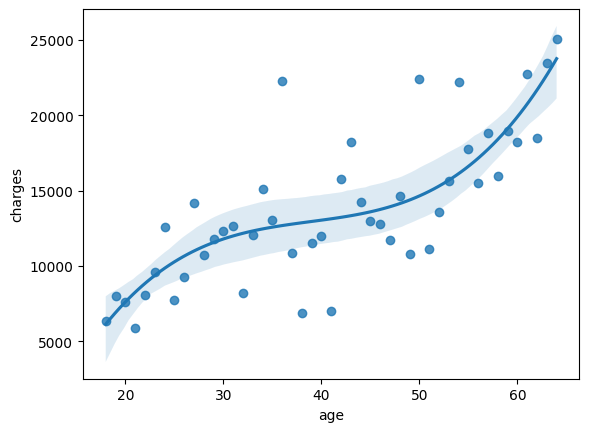

In [8]:
dfamzius = df[['age', 'charges']].groupby('age').mean(numeric_only=True).reset_index()
dfamzius.head()

axis=sns.regplot(data=dfamzius, x='age', y='charges', order=3)
# axis.set_xlim(0, 5e5)
# axis.set_ylim(0, 6e4)
plt.show()

In [15]:
dflytis = df[['sex', 'charges']].groupby('sex').mean(numeric_only=True).reset_index()
dflytis.head()


,sex,charges
0,female,12476.818970
1,male,14001.236855


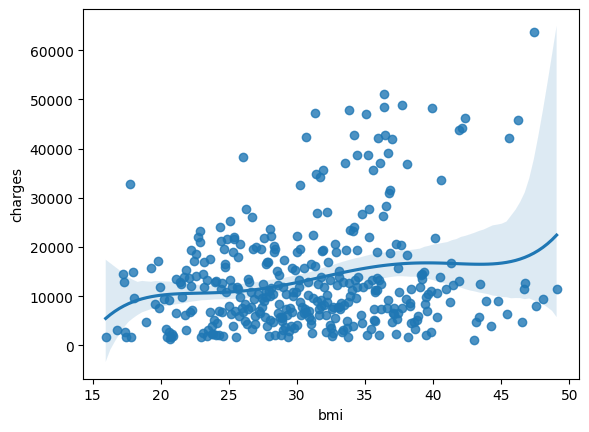

In [23]:
dfkunomase = df[['bmi', 'charges']].groupby('bmi').mean(numeric_only=True).reset_index()
dfkunomase.head()

axis=sns.regplot(data=dfkunomase, x='bmi', y='charges', order=5)
# axis.set_xlim(0, 5e5)
# axis.set_ylim(0, 6e4)
plt.show()

In [25]:
dfruko = df[['smoker', 'charges']].groupby('smoker').mean(numeric_only=True).reset_index()
dfruko.head()


,smoker,charges
0,no,8565.962365
1,yes,32320.007346


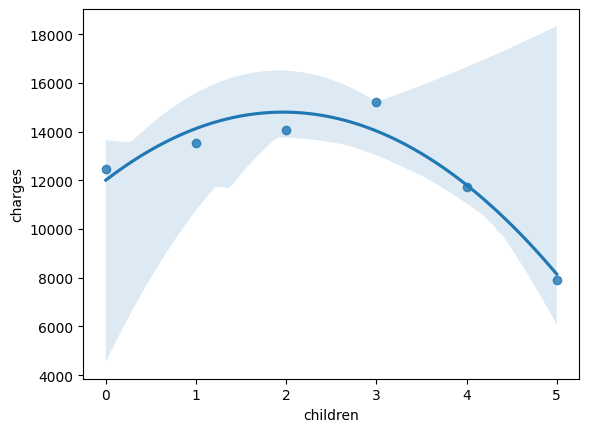

In [30]:
dfvaikai = df[['children', 'charges']].groupby('children').mean(numeric_only=True).reset_index()
dfvaikai.head()

axis=sns.regplot(data=dfvaikai, x='children', y='charges', order=2)
# axis.set_xlim(0, 5e5)
# axis.set_ylim(0, 6e4)
plt.show()

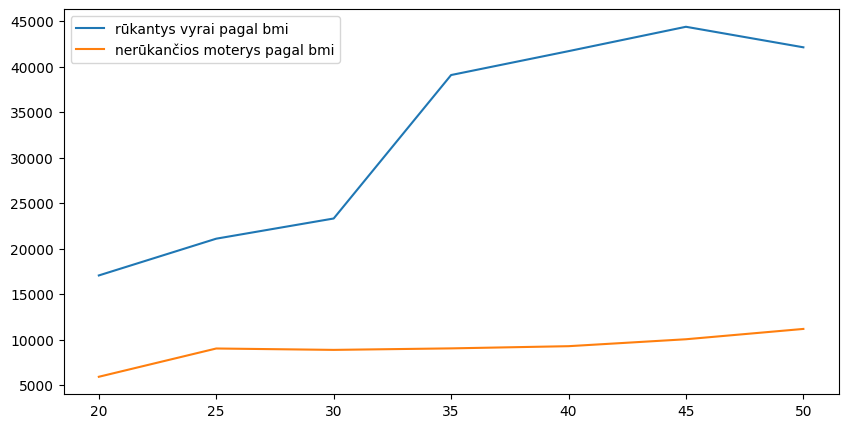

In [47]:
def apvalinubmi(a):
    return np.ceil(a/5)*5
    
df1=df
df1['bmi']=df1['bmi'].apply(apvalinubmi)

dflaikinas = df1[df1['sex']== 'male']
dflaikinas = dflaikinas[dflaikinas['smoker']== 'yes']
dfbmiM = dflaikinas[['bmi', 'charges']].groupby('bmi').mean(numeric_only=True).reset_index()

dflaikinas = df1[df1['sex']== 'female']
dflaikinas = dflaikinas[dflaikinas['smoker']== 'no']
dfbmiF = dflaikinas[['bmi', 'charges']].groupby('bmi').mean(numeric_only=True).reset_index()


fig, axis = plt.subplots(figsize=(10, 5))
 
axis.plot(dfbmiM['bmi'], dfbmiM['charges'], label = 'rūkantys vyrai pagal bmi')
axis.plot(dfbmiF['bmi'], dfbmiF['charges'], label = 'nerūkančios moterys pagal bmi')

axis.set_xticks(dfbmiM['bmi'])
axis.legend(loc='best')
plt.show()


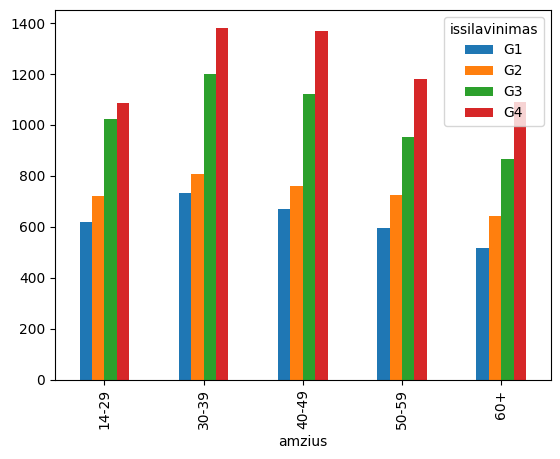

In [58]:
sql="""SELECT amzius, bdu_spalio, issilavinimas FROM works.DUS2018N;"""
C.execute(sql)
ans = C.fetchall()
amzius, bdu, issilavinimas = list(map(list, zip(*ans)))

# df = pd.DataFrame(ans, columns=['gamintojas', 'price', 'data', 'rida', 'pavaros', 'variklis'])
# df.head(2)

df = pd.read_sql_query(sql, con=DB)
df.head(3)

df.groupby(['amzius', 'issilavinimas'])['bdu_spalio'].mean().unstack().plot(kind='bar')
plt.show()

In [61]:
SDB = sqlite3.connect('Testas.db') #jei neegzistuoja bus sukurta nauja DB
Cs = SDB.cursor()

In [66]:
SDB = sqlite3.connect('../../DATA/sqlData.db') #jei neegzistuoja bus sukurta nauja DB
Cs = SDB.cursor()

In [67]:
sql="""SELECT amzius, bdu_spalio, issilavinimas FROM DUS2018N;"""
Cs.execute(sql)

df = pd.read_sql_query(sql, con=SDB)
df.head(3)

,amzius,bdu_spalio,issilavinimas
0,40-49,460,G2
1,50-59,1487,G2
2,40-49,1500,G2


In [68]:
sql = '''create table T1
(
name text not null,
surname text not null,
age integer not null,
salary real not null
)
'''
Cs.execute(sql)

In [69]:
sql_template = '''insert into T1 values (?,?,?,?)'''
data = [("Ona", "Onynė", 24, 1860),("Jonas", "Jonėnas", 28,
1670),("Petras", "Petrynas", 42, 2760)]
Cs.executemany(sql_template, data)

In [70]:
SDB.commit() # commit butinas norint irasyti duomenis i db

In [72]:
SDB = sqlite3.connect('Testas.db') # jei neegsiztuoja - bus sukurfta nauja sqlite DB
Cs = SDB.cursor()

sql = '''create table if not exists T1
(
name text not null,
surname text not null,
age integer not null,
salary real not null
)
'''
Cs.execute(sql)

sql_template = '''insert into T1 values (?,?,?,?)'''
data = [("Ona", "Onynė", 24, 1860),("Jonas", "Jonėnas", 28, 1670),("Petras", "Petrynas", 42, 2760)]
Cs.executemany(sql_template, data)

Cs.execute(sql_template, ('T1', 'F1', 10, 1024))

SDB.commit() # commit() būtinas, jei norite įrašyti duoenis į DB

SDB.close()